<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.%203/3_1_SinX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The sin(x) with pytorch

In [3]:
import torch
import torch.nn as nn

import numpy as np

from torch.nn import functional as F
import torch.optim as optim

from matplotlib import pyplot as plt

#### -3.14 ~ 3.14 사이에 200개의 난수를 생성

In [4]:
# true data 생성
# N is 200 for 140 train sample and 60 test sample로 나누어줄 예정
N = 200
X = np.linspace(-np.pi, np.pi, N).reshape(N, 1)
print(X[:10]) 

[[-3.14159265]
 [-3.11001886]
 [-3.07844506]
 [-3.04687127]
 [-3.01529747]
 [-2.98372368]
 [-2.95214988]
 [-2.92057608]
 [-2.88900229]
 [-2.85742849]]


#### x 값을 sin graph 에 대입하여 그에 맞는 y 값을 가져옴 (sin y 값)
#### y 값에 가우시안 분포 난수를 + - 를 하여 noise 를 생성

In [5]:
# x data 를 sin 그래프에 대입
sin_y = np.sin(X)

# add noise (가우시안 분포를 따르는 난수를 더하거나 뺀다)
y = sin_y + 0.1*np.random.randn(N, 1)

# shuffle
idx = np.random.permutation(N)
X_ = X[idx]
y_ = y[idx]

#### 그래프를 그려서 noise 가 어떻게 생성되었는지 확인해보자

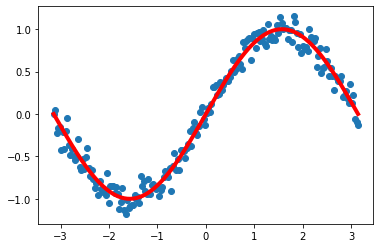

In [6]:
# show
plt.figure()
# sin 그래프

plt.plot(X, sin_y, c='r', linewidth=4.0)
# scatter 가 아닌 plot 을 하면 그래프가 직선으로 이어진다
plt.scatter(X, y)
plt.show()

#### 200개의 샘플을 이용해 feature 를 만들기로 하자

In [7]:
# ^1~^4까지 만들도록 한다
n_feature = 5 # for loop 은 마지막은 포함하지 않으므로

PHI = np.ones(200).reshape(-1, 1) # 200개의 샘플이므로 np.ones('200') <- 200, 이백, 일렬로 펼쳐주어야 하므로 reshape

In [8]:
# np.ones(200) 은 대략 이렇게 생겼습니다.
np.ones(200)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
PHI.shape

(200, 1)

In [10]:
for i in range(1, n_feature):
    print(i)
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1) # 기존 PHI (1 이 200개 있는것) 에 X 의 1승부터 4승까지 차례대로 붙여준다
#np.power = 제곱 시에 사용하는 함수

print("The shape of PHI => {}".format(PHI.shape))
print("The number of X_data samples => {0} \nthe number of features => {1}".format(PHI.shape[0],PHI.shape[1]))
print("The number of y_data samples => {}".format(y.shape[0]))

1
2
3
4
The shape of PHI => (200, 5)
The number of X_data samples => 200 
the number of features => 5
The number of y_data samples => 200


In [11]:
PHI.shape

(200, 5)

In [12]:
PHI

array([[ 1.00000000e+00, -3.14159265e+00,  9.86960440e+00,
        -3.10062767e+01,  9.74090910e+01],
       [ 1.00000000e+00, -3.11001886e+00,  9.67221730e+00,
        -3.00807782e+01,  9.35517875e+01],
       [ 1.00000000e+00, -3.07844506e+00,  9.47682400e+00,
        -2.91738821e+01,  8.98101932e+01],
       [ 1.00000000e+00, -3.04687127e+00,  9.28342452e+00,
        -2.82853994e+01,  8.61819708e+01],
       [ 1.00000000e+00, -3.01529747e+00,  9.09201884e+00,
        -2.74151414e+01,  8.26648066e+01],
       [ 1.00000000e+00, -2.98372368e+00,  8.90260697e+00,
        -2.65629192e+01,  7.92564109e+01],
       [ 1.00000000e+00, -2.95214988e+00,  8.71518892e+00,
        -2.57285439e+01,  7.59545179e+01],
       [ 1.00000000e+00, -2.92057608e+00,  8.52976467e+00,
        -2.49118267e+01,  7.27568853e+01],
       [ 1.00000000e+00, -2.88900229e+00,  8.34633423e+00,
        -2.41125787e+01,  6.96612951e+01],
       [ 1.00000000e+00, -2.85742849e+00,  8.16489760e+00,
        -2.33306110e+01

In [13]:
np.power(X, 1)[:5] # X 의 1승

array([[-3.14159265],
       [-3.11001886],
       [-3.07844506],
       [-3.04687127],
       [-3.01529747]])

In [14]:
np.power(X, 2)[:5] # X 의 2승

array([[9.8696044 ],
       [9.6722173 ],
       [9.476824  ],
       [9.28342452],
       [9.09201884]])

In [15]:
np.power(X, 3)[:5] # X 의 3승

array([[-31.00627668],
       [-30.08077819],
       [-29.17388206],
       [-28.28539942],
       [-27.41514142]])

In [16]:
np.power(X, 4)[:5] # X 의 4승

array([[97.40909103],
       [93.55178745],
       [89.81019319],
       [86.18197078],
       [82.66480662]])

**shuffle data**

In [17]:
# shuffle data
np.random.seed(10)

# N은 200이므로 1~200까지의 수를 섞어준다 (permutation(N))
idx = np.random.permutation(N)
print("After permutation", idx[:7])

shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

print(shuffle_X.shape)
print(shuffle_PHI.shape)
print(shuffle_y.shape)

After permutation [ 59   5  20 198  52  19 162]
(200, 1)
(200, 5)
(200, 1)


### Split train and test

In [27]:
# train data 140개
n = 140

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train.shape)

# test data 60개
X_test = shuffle_X[n:]
PHI_test = shuffle_PHI[n:]
y_test = shuffle_y[n:]

print(PHI_test.shape)

(140, 5)
(60, 5)


#### train 과 test 로 구분해서 그래프를 그려준다

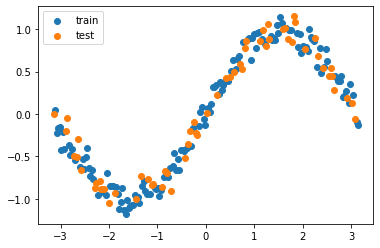

In [28]:
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

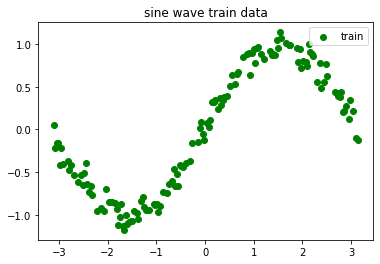

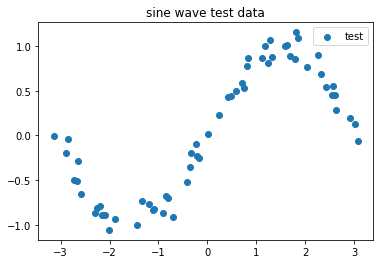

In [29]:
# plot
plt.scatter(X_train, y_train, label='train', c='g')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

### Make data to tensor

ts_whole_X = train, test 를 포함한 모든 X data의 tensor 형

In [30]:
ts_whole_X = torch.tensor(PHI, dtype=torch.float)

ts_train_X = torch.tensor(PHI_train, dtype=torch.float)
ts_train_y = torch.tensor(y_train, dtype=torch.float)

ts_test_X = torch.tensor(PHI_test, dtype=torch.float)
ts_test_y = torch.tensor(y_test, dtype=torch.float)

### ANN architecture

In [31]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(5, 64) # input layer
        self.fc2 = nn.Linear(64, 64) # hidden layer1
        self.fc3 = nn.Linear(64, 64) # hidden layer2
        self.fc4 = nn.Linear(64, 64) # hidden layer3
        self.fc5 = nn.Linear(64, 64) # hidden layer4
        self.fc6 = nn.Linear(64, 64) # hidden layer5
        self.fc7 = nn.Linear(64, 16) # hidden layer6
        self.fc8 = nn.Linear(16, 16) # hidden layer7
        self.fc9 = nn.Linear(16, 1) # output layer

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = F.tanh(self.fc3(x))
        x = F.tanh(self.fc4(x))
        x = F.tanh(self.fc5(x))
        x = F.tanh(self.fc6(x))
        x = F.tanh(self.fc7(x))
        x = F.tanh(self.fc8(x))
        x = torch.tanh(self.fc9(x))
        
        return x
    
model = ANN()

In [ ]:
# class ANN(nn.Module):
#     def __init__(self):
#         super(ANN, self).__init__()
#         self.fc1 = nn.Linear(5, 64) # input layer
#         self.fc2 = nn.Linear(64, 64) # hidden layer1
#         self.fc3 = nn.Linear(64, 64) # hidden layer2
#         self.fc4 = nn.Linear(64, 64) # hidden layer3
#         self.fc5 = nn.Linear(64, 64) # hidden layer4
#         self.fc6 = nn.Linear(64, 64) # hidden layer5
#         self.fc7 = nn.Linear(64, 16) # hidden layer6
#         self.fc8 = nn.Linear(16, 16) # hidden layer7
#         self.fc9 = nn.Linear(16, 1) # output layer

#     def forward(self, x):
#         x = F.sigmoid(self.fc1(x))
#         x = F.sigmoid(self.fc2(x))
#         x = F.sigmoid(self.fc3(x))
#         x = F.sigmoid(self.fc4(x))
#         x = F.sigmoid(self.fc5(x))
#         x = F.sigmoid(self.fc6(x))
#         x = F.sigmoid(self.fc7(x))
#         x = F.sigmoid(self.fc8(x))
#         x = torch.sigmoid(self.fc9(x))
        
#         return x
    
# model = ANN()

## 1. SGD optimizer 로 training

#### Loss Function & Optimizer (SGD)

In [36]:
loss_function = nn.MSELoss() # mean squared error
optimizer = optim.SGD(model.parameters(), lr= 1e-1)

#### train model-SGD

In [38]:
loss_arr = []
epoch = 100

for num_epoch in range(epoch):

    optimizer.zero_grad()
    prediction = model(ts_train_X)
    loss = loss_function(prediction, ts_train_y) # (예측값, 실제값)

    
    loss.backward()
    optimizer.step()
    loss_arr.append(loss.item())
    
    if num_epoch % 20 == 0:
        print("epoch ==> {}\tloss ==> {:.5f}".format(num_epoch, loss))
        
print("Finish train")

epoch ==> 0	loss ==> 0.01682
epoch ==> 20	loss ==> 0.01835
epoch ==> 40	loss ==> 0.01811
epoch ==> 60	loss ==> 0.01760
epoch ==> 80	loss ==> 0.01713
Finish train


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### test model

In [39]:
with torch.no_grad(): # we don't need gradients (testing phase)
    predicted_test = model(ts_test_X)
    predicted_whole = model(ts_whole_X)
    
print("Finish test")

Finish test


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### Loss 값 확인

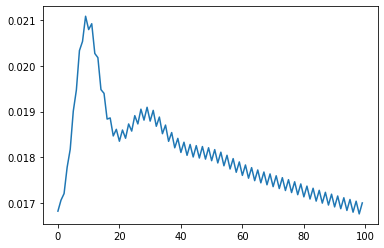

In [40]:
plt.figure()
plt.plot(loss_arr)
plt.show()          

### Visualization

In [41]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

### Test data 확인

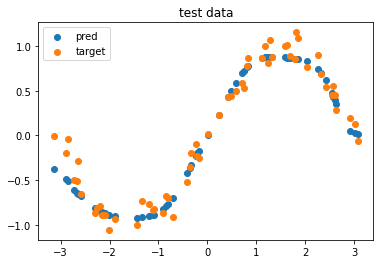

In [42]:
plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

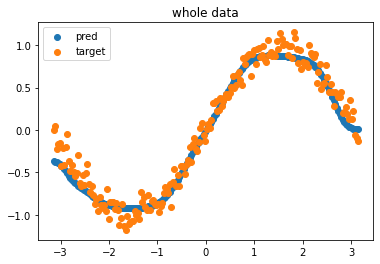

In [43]:
plt.figure()
plt.scatter(X, y_whole_pred, label='pred')
plt.scatter(X, y, label='target')
plt.legend()
plt.title('whole data')
plt.show()

## 2. ADAM optimizer

### Model 새로 생성

In [44]:
model = ANN()

### Loss Function & Optimizer (ADAM)

In [45]:
loss_function = nn.MSELoss() # mean squared error
optimizer = optim.Adam(model.parameters(), lr= 1e-2)

### train model-ADAM

In [46]:
loss_arr = []
epoch = 100

for num_epoch in range(epoch):
    prediction = model(ts_train_X)
    loss = loss_function(prediction, ts_train_y) # (예측값, 실제값)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_arr.append(loss.item())
    
    if num_epoch % 20 == 0:
        print("epoch ==> {}\tloss ==> {:.5f}".format(num_epoch, loss))
        
print("Finish train")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch ==> 0	loss ==> 0.58467
epoch ==> 20	loss ==> 0.09666
epoch ==> 40	loss ==> 0.05813
epoch ==> 60	loss ==> 0.04092
epoch ==> 80	loss ==> 0.03718
Finish train


### test model

In [47]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted_test = model(ts_test_X)
    predicted_whole = model(ts_whole_X)
    
print("Finish test")

Finish test


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### Loss 값 확인

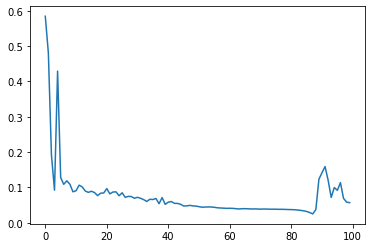

In [48]:
plt.figure()
plt.plot(loss_arr)
plt.show()          

### Visualization

In [49]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

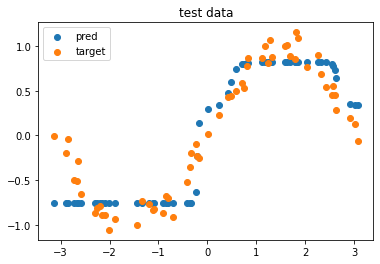

In [50]:
### Visualization

y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)
plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

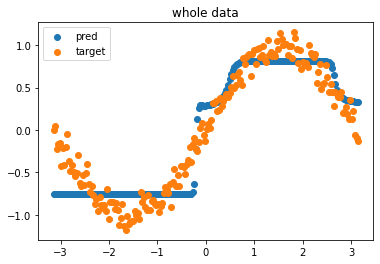

In [51]:
plt.figure()
plt.scatter(X, y_whole_pred, label='pred')
plt.scatter(X, y, label='target')
plt.legend()
plt.title('whole data')
plt.show()

## 3. ADAM의 Lr 을 다양하게 바꿔가면서 비교

### Model 새로 생성

In [52]:
model = ANN()

In [53]:
loss_function = nn.MSELoss() # mean squared error
optimizer = optim.Adam(model.parameters(), lr= 1e-5)

### train model-ADAM

In [54]:
loss_arr = []

# 100 epoch
for step in range(100):
    prediction = model(ts_train_X)
    loss = loss_function(prediction, ts_train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_arr.append(loss.item())
    
    if step % 20 ==0:
        print("loss => %.5f"%loss.item())

print("Finish train")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


loss => 0.54920
loss => 0.54652
loss => 0.54383
loss => 0.54110
loss => 0.53827
Finish train


### test model

In [55]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted_test = model(ts_test_X)
    predicted_whole = model(ts_whole_X)
    
print("Finish test")

Finish test


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### Visualization

In [57]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

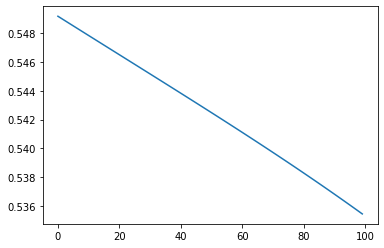

In [58]:
plt.figure()
plt.plot(loss_arr)
plt.show()          

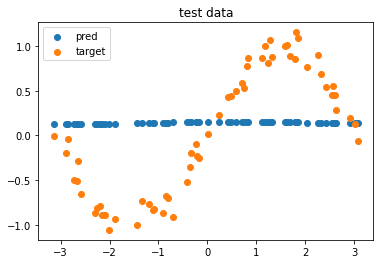

In [59]:
plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

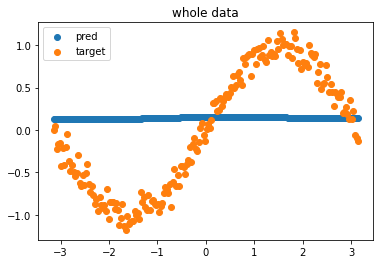

In [60]:
plt.figure()
plt.scatter(X, y_whole_pred, label='pred')
plt.scatter(X, y, label='target')
plt.legend()
plt.title('whole data')
plt.show()

# learning rate를 제대로 설정하지 않으면 제대로 training되지 않음 확인